This notebook shows compares the 4 original and adversarial waether features with the highest inter observation variations introduced by the stealthy bifurcated PGD attack.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'legend.fontsize': 'xx-large',
          #'font.size': 16,
          'axes.titlesize': 'xx-large',
          'figure.titlesize': 'xx-large',
          }
pylab.rcParams.update(params)

Values from phase 2 dataset analysis

In [3]:
MIN_TEMP = 5.6
MIN_HUMIDITY = 10 #percent

In [4]:
weather_features = ['outdoor_dry_bulb_temperature','outdoor_relative_humidity','direct_solar_irradiance','diffuse_solar_irradiance']
df_bline = pd.read_csv(r'default SAC 500 norm space results\baseline_obs-a.csv',
                       usecols=weather_features)
df_adv = pd.read_csv(r'default SAC 500 norm space results\untargeted_binary_myPGD_03_mask_solar_and_time_scale_consumption_eps_clipped_adv_obs_adv_obs-a.csv',
                       usecols=weather_features)

In [5]:
spreads = pd.read_csv('citylearn_challenge_2022_phase_2 spread.csv',
                      index_col=0)

In [8]:
spreads.loc['outdoor_dry_bulb_temperature'].values

array([26.6])

In [9]:
df_temp = pd.DataFrame({})
df_temp['bline'] = df_bline['outdoor_dry_bulb_temperature']*spreads.loc['outdoor_dry_bulb_temperature'].values + MIN_TEMP
df_temp['adv'] = df_adv['outdoor_dry_bulb_temperature']*spreads.loc['outdoor_dry_bulb_temperature'].values + MIN_TEMP

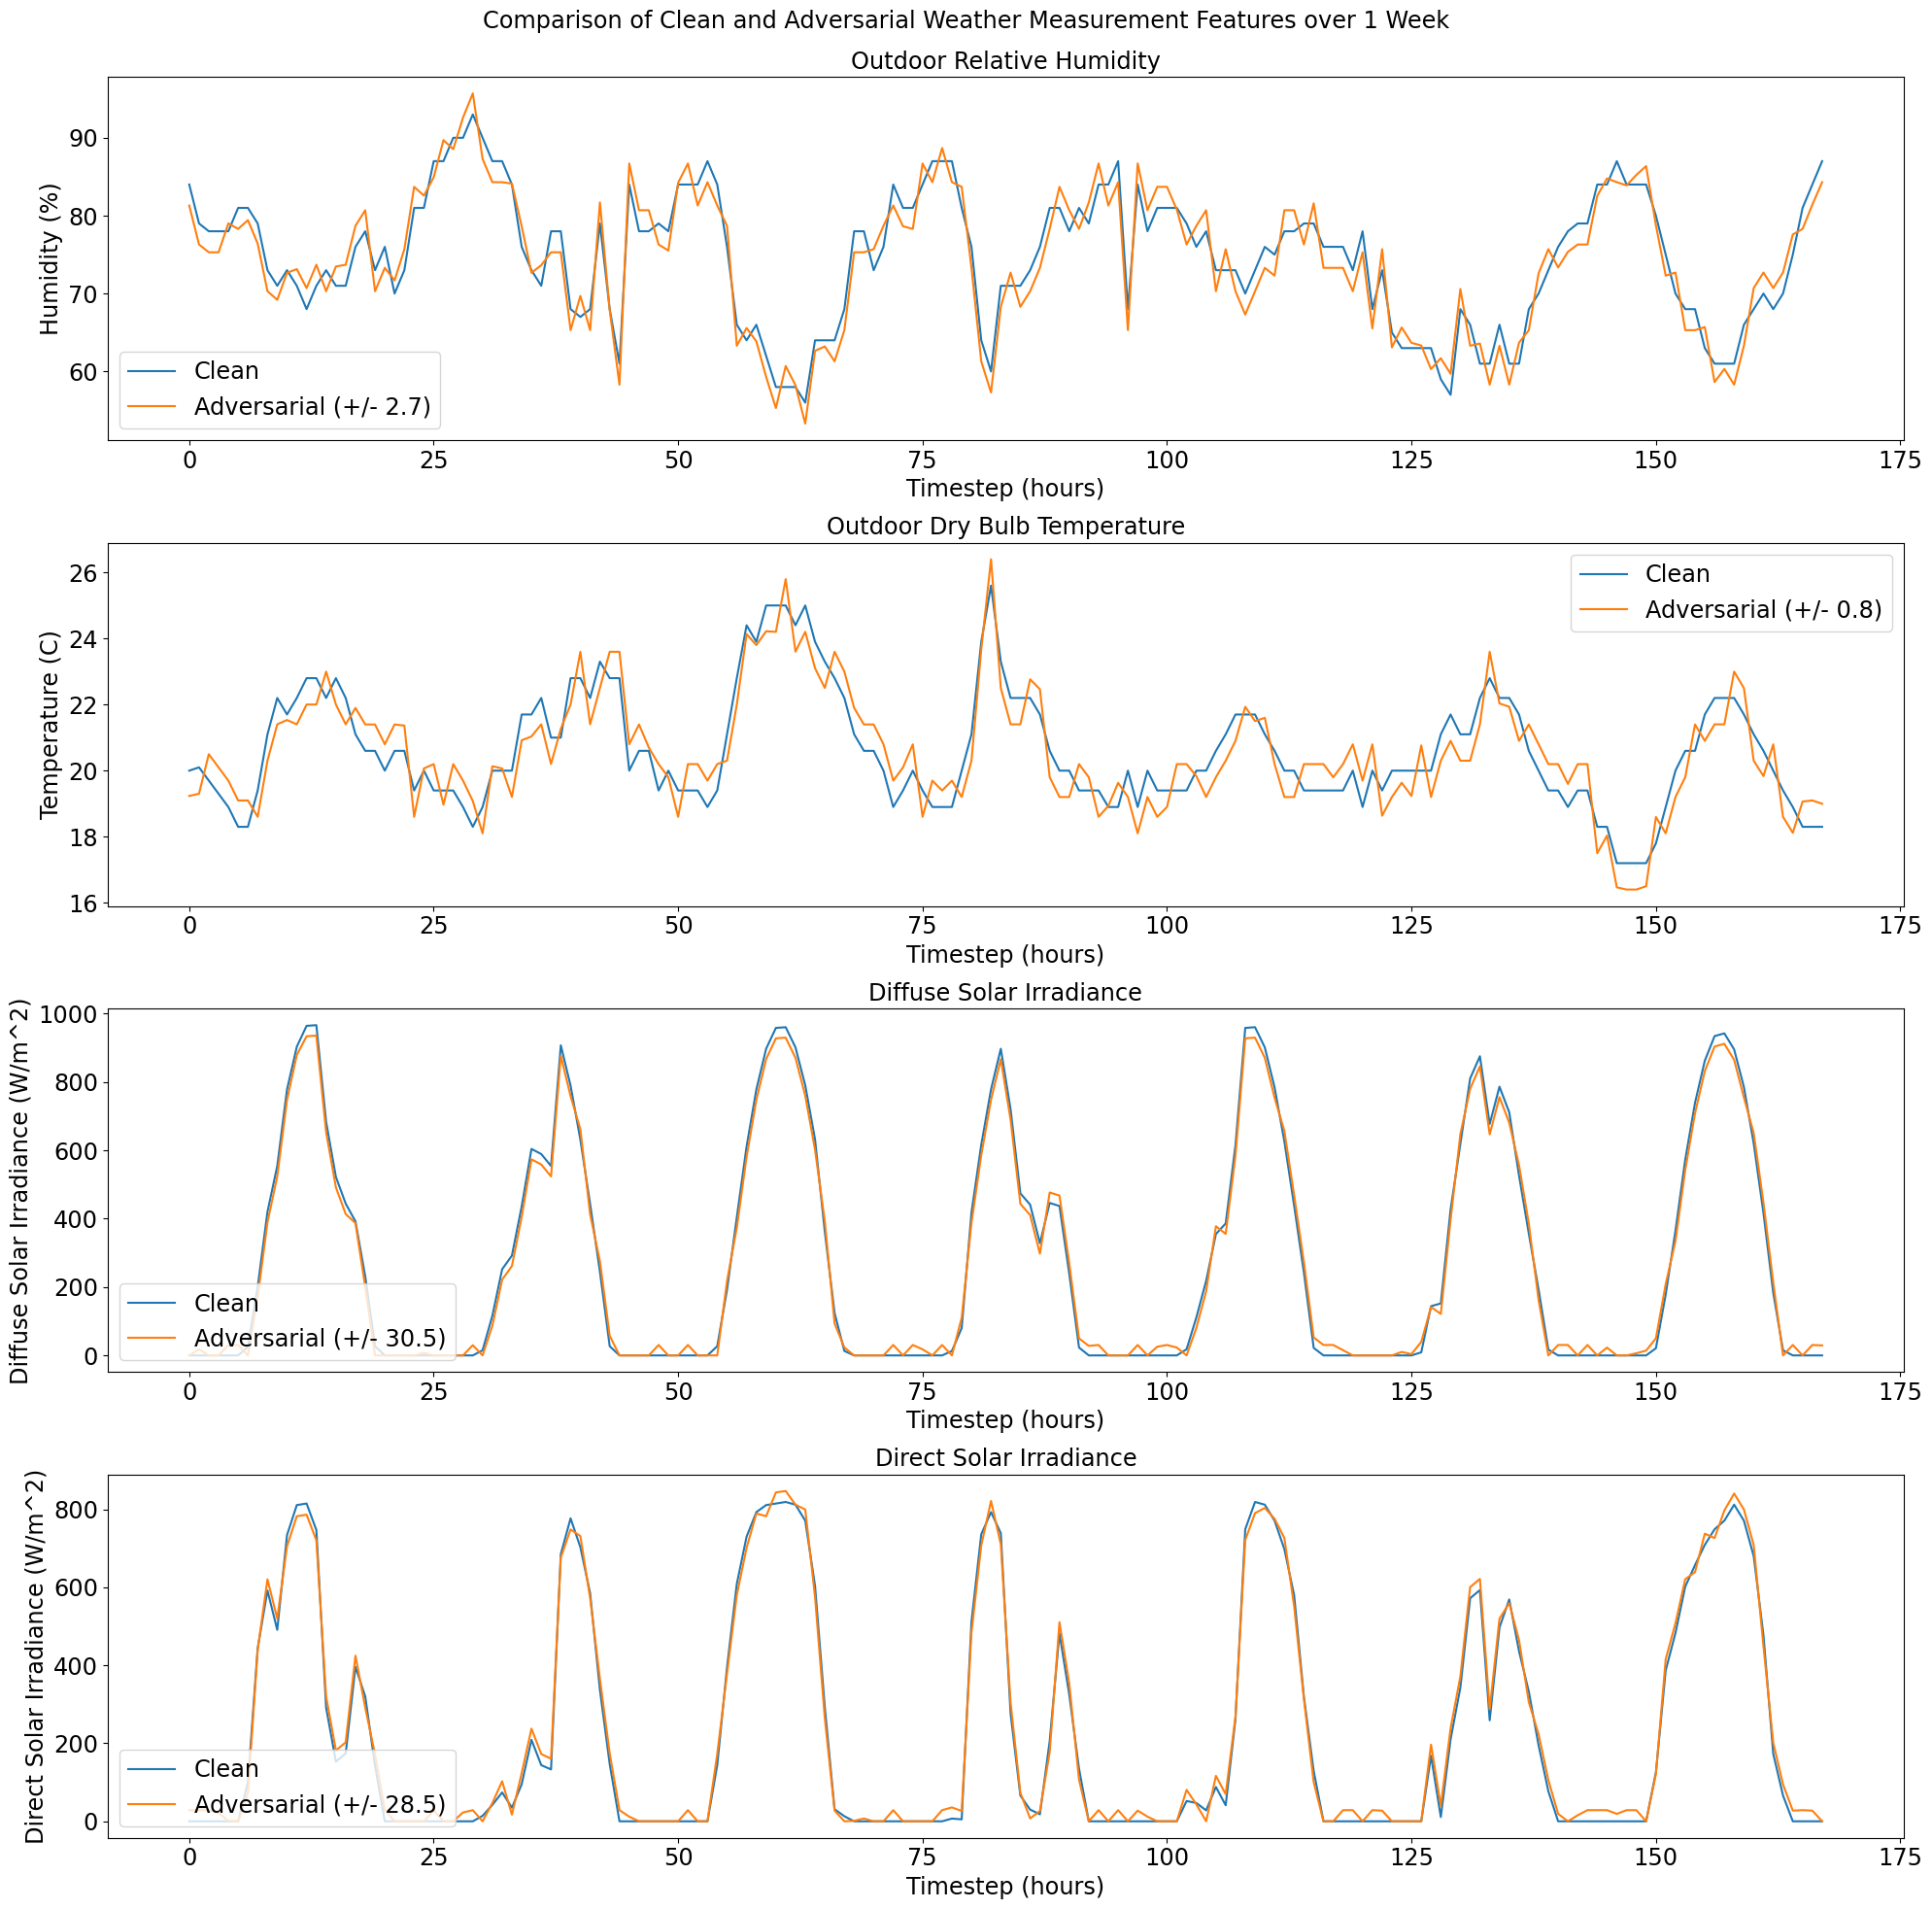

In [17]:
fig = plt.figure(figsize=[20,20],)
fig.suptitle('Comparison of Clean and Adversarial Weather Measurement Features over 1 Week\n')

plt.subplot(4, 1, 1) #(row, col, plt#)
ax = df_humidity.iloc[:24*7,:].plot.line(title='Outdoor Relative Humidity',
                                     ax=plt.gca(), #get current axis
                                     )
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial (+/- 2.7)'])

plt.subplot(4, 1, 2) #(row, col, plt#)
ax = df_temp.iloc[:24*7,:].plot.line(title='Outdoor Dry Bulb Temperature',
                                     ax=plt.gca(), #get current axis
                                     ylabel='Temperature (C)',
                                     xlabel='Timestep (hours)'
                                     )
# ax.set_ylabel('Temperature')
# ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial (+/- 0.8)'])

plt.subplot(4, 1, 3) #(row, col, plt#)
ax = df_diffuse.iloc[:24*7,:].plot.line(title='Diffuse Solar Irradiance',
                                     ax=plt.gca(), #get current axis
                                     )
ax.set_ylabel('Diffuse Solar Irradiance (W/m^2)')
ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial (+/- 30.5)'],
          loc='lower left')
plt.subplot(4, 1, 4) #(row, col, plt#)

ax = df_direct.iloc[:24*7,:].plot.line(title='Direct Solar Irradiance',
                                     ax=plt.gca(), #get current axis
                                     )
ax.set_ylabel('Direct Solar Irradiance (W/m^2)')
ax.set_xlabel('Timestep (hours)')
ax.legend(['Clean','Adversarial (+/- 28.5)'],
          loc='lower left')
plt.tight_layout()